In [ ]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!nvidia-smi

Wed Jun 26 13:51:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
import os
from ultralytics import YOLO
import random
from IPython.display import Image
from roboflow import Roboflow

Configure uma pasta do drive para salvar os arquivos.

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')
HOME = os.getcwd()

Mounted at /content/drive


Baixa o dataset escolhido pelo grupo!

In [ ]:
rf = Roboflow(api_key="CxkSFwEwGeDbi7yYJtKo") #Use uma chave API do roboflow para baixar o dataset
project = rf.workspace("shahad-alotaibi-ujdrb").project("car-accident-severity")
version = project.version(1)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Accident-Severity-1 in yolov8-obb:: 100%|██████████| 13316/13316 [01:53<00:00, 116.86it/s]


## Treinamento

Todos os argumentos e hyperparâmetros do YOLO: https://docs.ultralytics.com/modes/train/#resuming-interrupted-trainings

In [ ]:
model = YOLO(model='yolov8n.pt')

result = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=20,
    patience=0, #o modelo para o treinamento caso não haja melhoria nos dados de validação (evita o overfiting)
    batch=16,
    imgsz=640,
    workers=8, #qtnd de threads a serem usadas da GPU (default=8)
    pretrained=True, #
    resume=False, #continue o treinamento caso não alcance o n° total de épocas
    single_cls=False, #unificação de todas as classes em uma só (interessante testar)
    box=7.5,
    cls=0.5,
    dfl=1.5,
    val=True, #validação após o final de cada época (importante para acompanhar a evolução do modelo mas consome mais processamento da GPU)
    degrees=0.3,
    hsv_s=0.3,
    hsv_v=0.3,
    scale=0.5,
    fliplr=0.5
)

Ultralytics YOLOv8.2.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Car-Accident-Severity-1/data.yaml, epochs=20, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

train: Scanning /content/drive/MyDrive/Car-Accident-Severity-1/train/labels... 5321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5321/5321 [00:51<00:00, 103.89it/s]


train: New cache created: /content/drive/MyDrive/Car-Accident-Severity-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/Car-Accident-Severity-1/valid/labels... 998 images, 0 backgrounds, 0 corrupt: 100%|██████████| 998/998 [00:17<00:00, 56.28it/s] 


val: New cache created: /content/drive/MyDrive/Car-Accident-Severity-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.34G      1.166      2.108       1.44         26        640: 100%|██████████| 333/333 [02:54<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


                   all        998       1038      0.509      0.352      0.344      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.28G      1.263      1.697        1.5         21        640: 100%|██████████| 333/333 [02:47<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


                   all        998       1038      0.407      0.571      0.471      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.29G      1.271        1.6      1.507         22        640: 100%|██████████| 333/333 [02:51<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


                   all        998       1038      0.505      0.584      0.562      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.29G      1.236      1.487      1.479         22        640: 100%|██████████| 333/333 [02:46<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.70it/s]


                   all        998       1038      0.605      0.616      0.639      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.28G      1.155      1.375      1.419         20        640: 100%|██████████| 333/333 [02:48<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]

                   all        998       1038       0.69      0.675      0.727      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.29G      1.098       1.26      1.373         26        640: 100%|██████████| 333/333 [02:49<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


                   all        998       1038      0.731      0.679       0.76      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.29G      1.062      1.203      1.354         20        640: 100%|██████████| 333/333 [02:52<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]

                   all        998       1038      0.769      0.682      0.797      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.29G      1.012      1.137      1.326         22        640: 100%|██████████| 333/333 [02:45<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

                   all        998       1038      0.758      0.682      0.768      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.28G     0.9783      1.066      1.298         21        640: 100%|██████████| 333/333 [02:46<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

                   all        998       1038      0.872      0.744      0.864      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.29G     0.9431      1.004      1.267         25        640: 100%|██████████| 333/333 [02:49<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all        998       1038      0.862      0.759      0.888      0.713
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.42G      0.706     0.6838      1.141          8        640: 100%|██████████| 333/333 [02:40<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all        998       1038      0.876      0.788      0.895      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.29G     0.6645     0.6137       1.11          9        640: 100%|██████████| 333/333 [02:37<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]

                   all        998       1038      0.891       0.83      0.911      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.28G     0.6211     0.5542      1.072          9        640: 100%|██████████| 333/333 [02:40<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]

                   all        998       1038      0.939      0.863      0.942      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.29G      0.586     0.4938      1.044          9        640: 100%|██████████| 333/333 [02:38<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]

                   all        998       1038      0.909      0.883      0.944      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.29G     0.5546     0.4482      1.017          9        640: 100%|██████████| 333/333 [02:35<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]

                   all        998       1038      0.953      0.909      0.961      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.29G     0.5239      0.406     0.9947          9        640: 100%|██████████| 333/333 [02:38<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]

                   all        998       1038      0.948      0.928      0.967      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.28G     0.4877      0.377     0.9683          9        640: 100%|██████████| 333/333 [02:36<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]

                   all        998       1038      0.961      0.935       0.97      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.29G     0.4634     0.3446     0.9567          9        640: 100%|██████████| 333/333 [02:34<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all        998       1038      0.967      0.935      0.972      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.29G     0.4358     0.3195     0.9349          8        640: 100%|██████████| 333/333 [02:36<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]

                   all        998       1038      0.975      0.947      0.975      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.29G     0.4119     0.2999     0.9176          9        640: 100%|██████████| 333/333 [02:41<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]

                   all        998       1038      0.969      0.955      0.978      0.899



20 epochs completed in 1.021 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]


                   all        998       1038      0.974      0.952      0.978      0.899
     accident moderate        257        261       0.96      0.927      0.969      0.874
       accident severe        746        777      0.988      0.977      0.988      0.924
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


## Avaliaçaõ do modelo

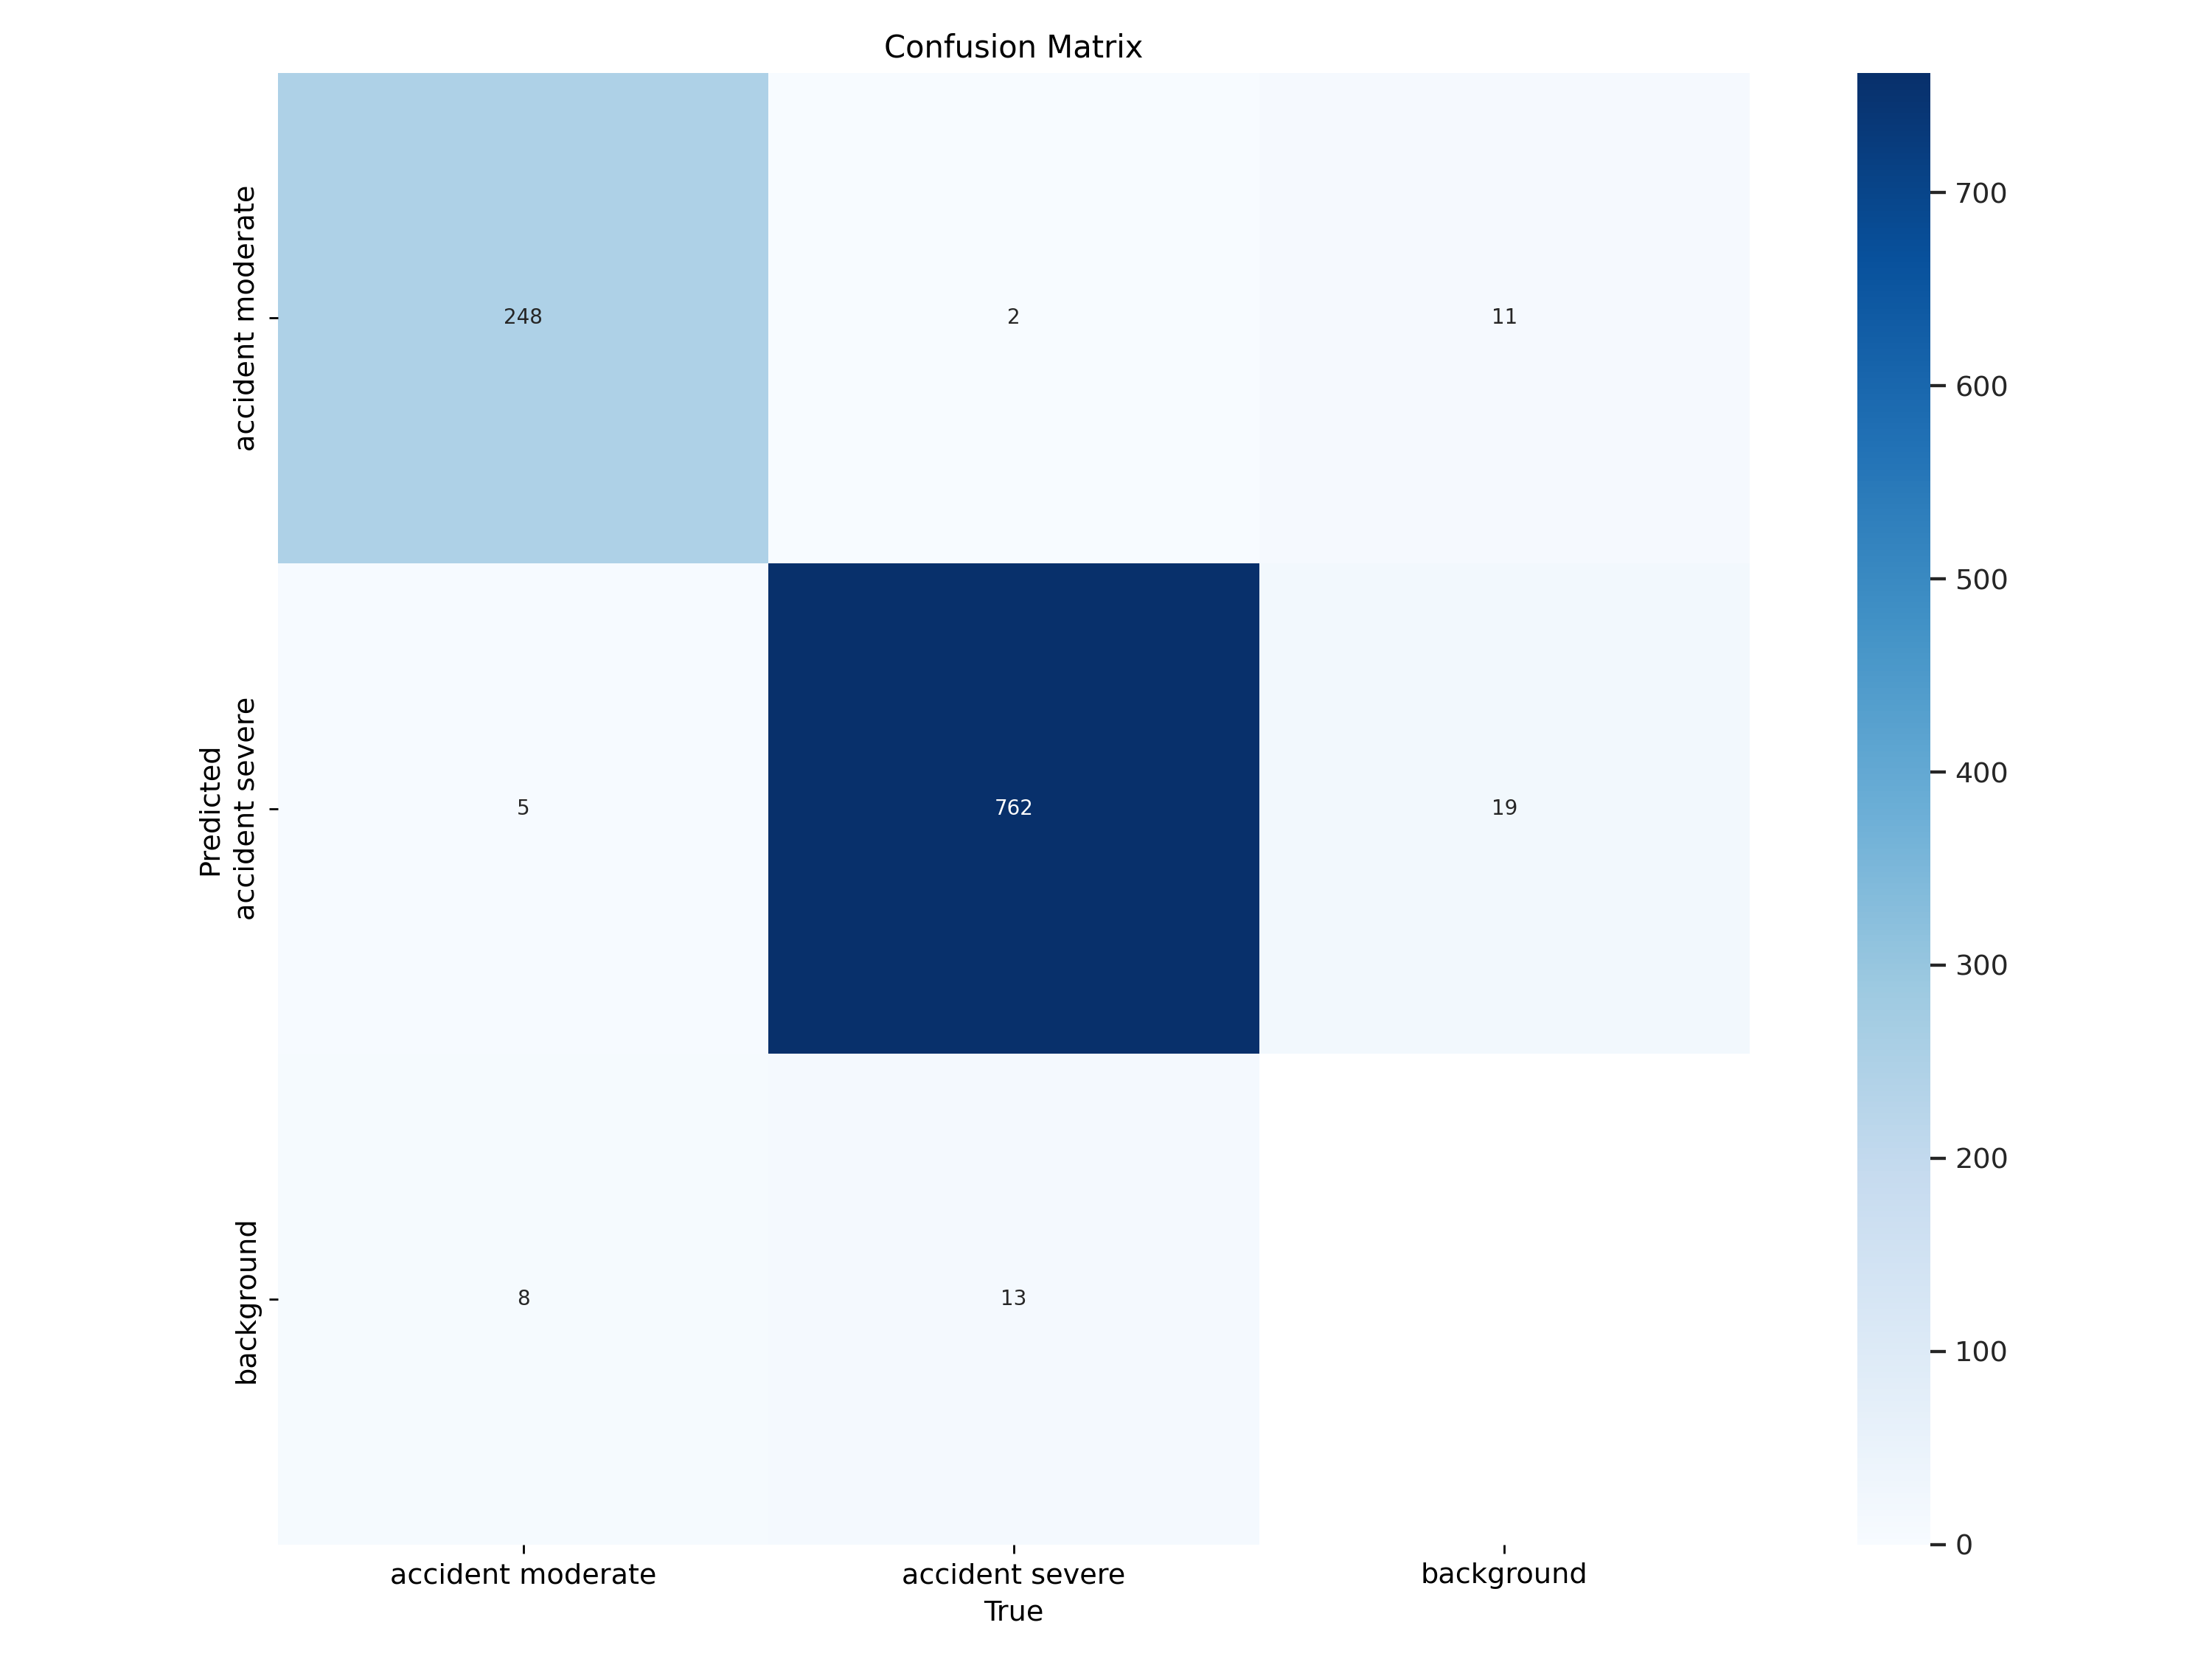

In [ ]:
# Confusion-Matrix
Image(f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

Algumas métricas importantes:

- **metrics/mAP50(B):**
  representa a média de precisão (mAP) com um threshold de 0.50 durante a validação. Um aumento consistente no mAP50 indica que o modelo está melhorando na detecção de objetos nos dados de validação.
- **metrics/mAP50-95(B):** representa a média de precisão (mAP) em um
intervalo de thresholds de 0.50 a 0.95 durante a validação. Um aumento consistente no mAP50-95 indica que o modelo está melhorando em uma gama de diferentes thresholds de detecção


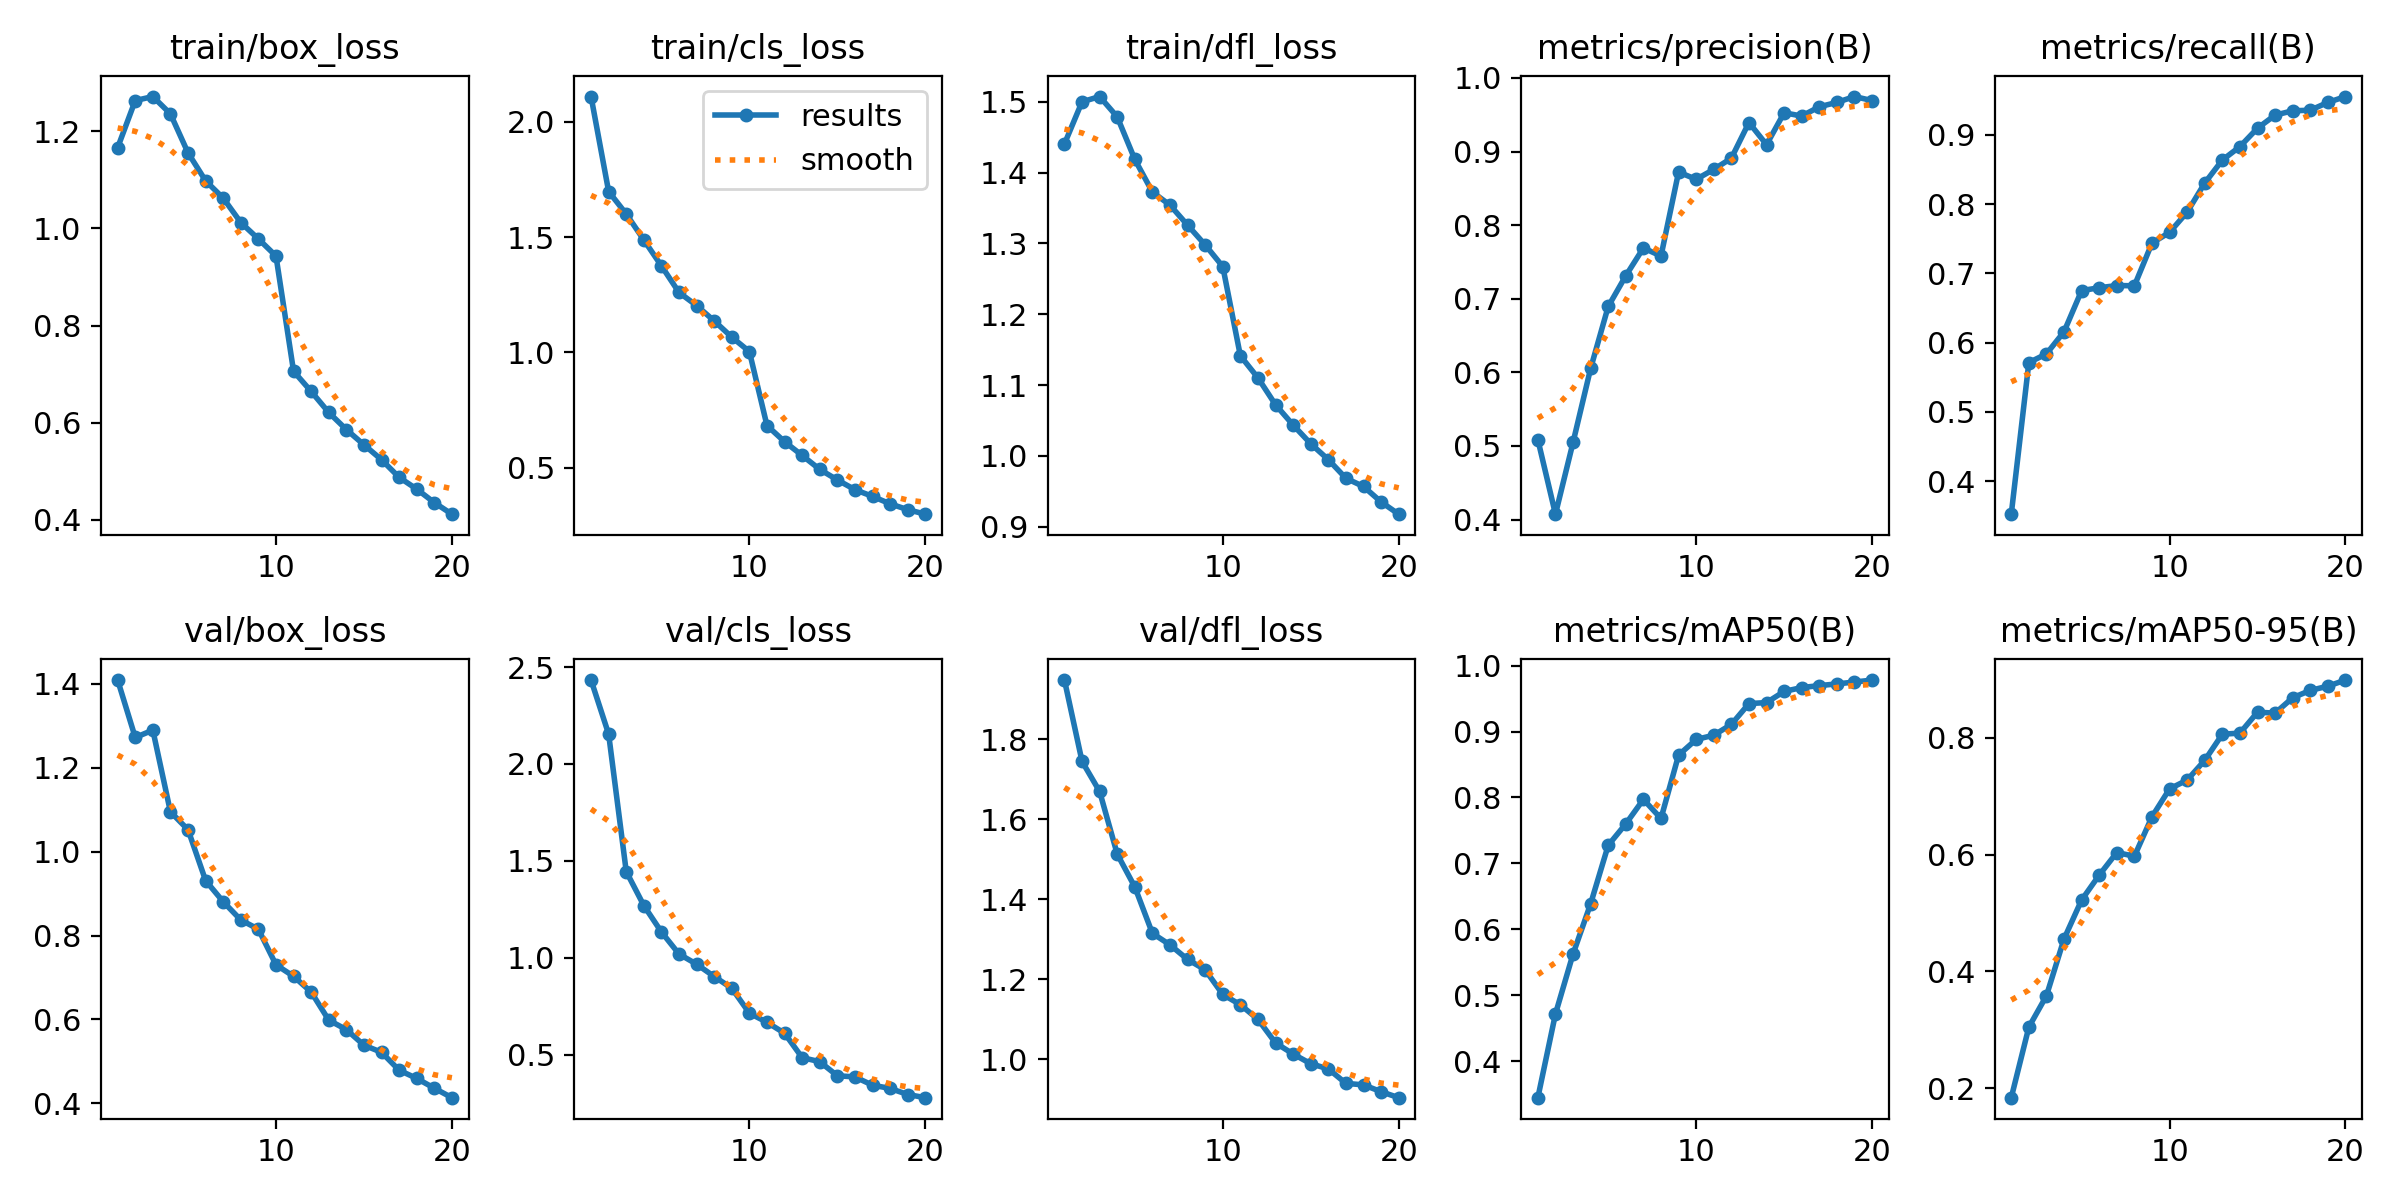

In [ ]:
Image(f'{HOME}/runs/detect/train/results.png', width=800)

## Validação e Teste

In [ ]:
# Iremos utilizar o modelo com o melhor desempenho durante o treinamento
model = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
results_val = model.val(
    data=f'{dataset.location}/data.yaml',
    imgsz=640,
    batch=8,
    conf=0.001,
    split='test'
)

Ultralytics YOLOv8.2.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Car-Accident-Severity-1/test/labels... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:03<00:00, 86.88it/s] 


val: New cache created: /content/drive/MyDrive/Car-Accident-Severity-1/test/labels.cache


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:10<00:00,  4.17it/s]


                   all        333        350      0.996      0.952      0.982      0.912
     accident moderate         73         73      0.999      0.932       0.97      0.896
       accident severe        262        277      0.993      0.973      0.994      0.928
Speed: 0.5ms preprocess, 8.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
